In [ ]:
!pip install pyzbar

In [ ]:
!apt-get install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

In [ ]:
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1bui

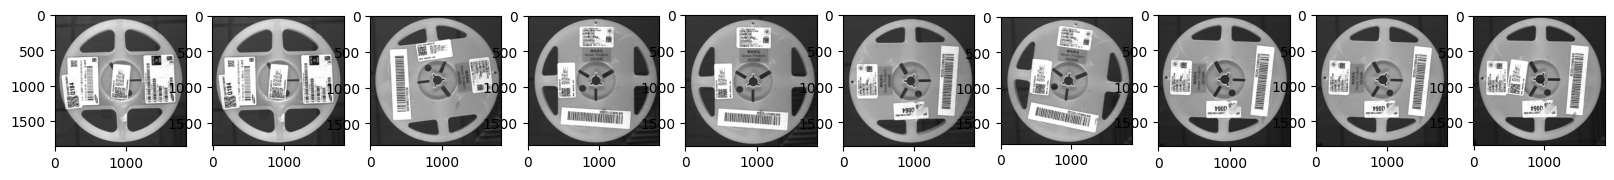

{'ner': 45.83333545923233}
{'ner': 43.34031403064728}
{'ner': 39.09105610847473}
{'ner': 32.867022931575775}
{'ner': 24.447106063365936}
{'ner': 14.404998853802681}
{'ner': 6.41185973957181}
{'ner': 2.30706620356068}
{'ner': 1.3136630724766292}
{'ner': 1.1030785949560595}


/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "i

01K 169052416223

qyonpoitg user
a O/d
00A29280..." with entities "[(0, 4, 'ORG')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


{'token_acc': 1.0, 'token_p': 1.0, 'token_r': 1.0, 'token_f': 1.0, 'ents_p': None, 'ents_r': None, 'ents_f': None, 'ents_per_type': None}


In [ ]:
!pip install pyzbar
!apt-get install libzbar0
!pip install pytesseract
!sudo apt-get install tesseract-ocr
!pip install pytesseract

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
import pyzbar.pyzbar as pyzbar
import json

path = r"/content/drive/MyDrive/dataset_images/images"

images = []

for filename in os.listdir(path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = Image.open(os.path.join(path, filename))
        images.append(img)

fig, axs = plt.subplots(1, 10, figsize=(20, 20))

for i in range(10):
    axs[i].imshow(images[i])

plt.show()

import pytesseract
import spacy
from spacy.util import minibatch, compounding
import random
from pathlib import Path

# Set the correct path for Tesseract OCR in Linux
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def ocr_core(image):
    text = pytesseract.image_to_string(image)
    return text

# Use the function on your images
extracted_texts = [ocr_core(img) for img in images]
extracted_texts

from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% of data used for training)
train_data, test_data = train_test_split(extracted_texts, test_size=0.2, random_state=42)

TRAIN_DATA = [
    ("WHAM\n\neeer .4¥144eND(0)\n\nSHOU\nS wv\n\n33u4 OWI\n\nWAY UN O0 NH N A\n\nJNNNGONSE! GB 10° «ON 3484 JHW(dl)\n\non, im\n\nONNNGOYSOL\n\nb19:\nne\n\n108°0 s°cde@ga'y a810/99188Id\nONNNSOWGELAGILT>\n\n", {"entities": [(0, 4, "ORG")]}),
    # ... add more sentences
]

import spacy
from spacy.training import Example

# Load a blank English model
nlp = spacy.blank('en')

# Create a new NER component and add it to the pipeline
ner = nlp.add_pipe('ner')

# Add the new label (in this case 'ORG') to the entity recognizer
ner.add_label('ORG')

# Start the training
nlp.begin_training()

# Train for 10 iterations
for itn in range(10):
    random.shuffle(TRAIN_DATA)
    losses = {}

    # Batch the examples and iterate over them
    for batch in spacy.util.minibatch(TRAIN_DATA, size=2):
        examples = [Example.from_dict(nlp.make_doc(text), entities) for text, entities in batch]

        # Update the model
        nlp.update(examples, losses=losses)
    print(losses)

# Adjust the save path for the trained model (consider using a Linux path within Colab)
nlp.to_disk("/content/drive/MyDrive/trained_model")


TEST_DATA = [
    ("i\n\n01K 169052416223\n\nqyonpoitg user\na O/d\n00A29280809}0018 88: Nid\n\n' [SHO\" | $Od 000r\n} 'SH y eoAzszgos09lLooNaEa\nHo\n\n", {"entities": [(0, 4, "ORG")]}),
    # ... add more sentences
]

from spacy.scorer import Scorer

#

# Load the saved model from disk
# Load the saved model from disk
nlp2 = spacy.load("/content/drive/MyDrive/trained_model")  # Load from the correct path

scorer = Scorer(nlp2)
scores = {}  # Initialize an empty dictionary to hold scores

# ... (rest of your code remains unchanged)

for text, annot in TEST_DATA:
    doc_gold_text = nlp2.make_doc(text)
    example = Example.from_dict(doc_gold_text, annot)
    scores.update(scorer.score([example]))  # Update the scores dictionary

print(scores)  # Print the scores

# Function to extract QR codes and barcodes from an image
def extract_codes(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Decode the QR codes and barcodes
    decoded_objects = pyzbar.decode(img)

    # Extract data and types
    extracted_data = []
    for obj in decoded_objects:
        extracted_data.append({
            "data": obj.data.decode('utf-8'),
            "type": obj.type
        })

    return extracted_data  # Return the list of extracted data, or an empty list if no codes are found

# Iterate over images and extract codes
all_data = []  # Initialize a list to store extracted data
for image_path in [os.path.join(path, filename) for filename in os.listdir(path) if filename.endswith(('.jpg', '.png'))]:
    all_data.extend(extract_codes(image_path))  # Call the function and extend the list

# Save the extracted data to a JSON file
with open('extracted_data.json', 'w') as f:
    json.dump(all_data, f, indent=4)